In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")

# special matplotlib argument for improved plots
#from matplotlib import rcParams

In [3]:
data = pd.read_csv('elance.csv')
data.head()

,Tagline,Rate,Rating,Level,Number_of_jobs,Category,Skills
0,WordPress-JAVA-iOS-Android Experts,NaN,60,13,326,IT & Programming,"WordPress, PHP, CSS, Search Engine Marketing (..."
1,Expert in Web Development,$22,48,13,15,IT & Programming,"WordPress, CSS, HTML, PHP5, Search Engine Opti..."
2,"Web, Mobile App Developer",$60,36,13,53,IT & Programming,"WordPress, Node.js, PHP, CSS, Javascript, jQue..."
3,"Scala, PHP, RoR, iOS, Android, Java, .NET",$30,60,12,44,IT & Programming,"PHP5, Ruby on Rails, iPhone App Development, W..."
4,Expert Nodejs and Elasticsearch (ELK) Consultant,$50,60,12,29,IT & Programming,"Elasticsearch, Groovy, Java, Grails, Node.js, ..."


In [4]:
data.dtypes

Tagline           object
Rate              object
Rating             int64
Level              int64
Number_of_jobs     int64
Category          object
Skills            object
dtype: object

In [5]:
data.drop('Tagline', axis=1, inplace=True)

In [6]:
data['Rate'] = data['Rate'].str.replace('$', '')
data['Skills'] = data['Skills'].str.replace(',', '')

In [7]:
data.dtypes

Rate              object
Rating             int64
Level              int64
Number_of_jobs     int64
Category          object
Skills            object
dtype: object

In [8]:
data.head()

,Rate,Rating,Level,Number_of_jobs,Category,Skills
0,NaN,60,13,326,IT & Programming,WordPress PHP CSS Search Engine Marketing (SEM...
1,22,48,13,15,IT & Programming,WordPress CSS HTML PHP5 Search Engine Optimiza...
2,60,36,13,53,IT & Programming,WordPress Node.js PHP CSS Javascript jQuery Am...
3,30,60,12,44,IT & Programming,PHP5 Ruby on Rails iPhone App Development Word...
4,50,60,12,29,IT & Programming,Elasticsearch Groovy Java Grails Node.js Angul...


In [9]:
data[['Rate']] = data[['Rate']].astype(float)

data.dtypes

Rate              float64
Rating              int64
Level               int64
Number_of_jobs      int64
Category           object
Skills             object
dtype: object

In [10]:
data.describe()

/Users/subigyanepal/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rate,Rating,Level,Number_of_jobs
count,3099.000000,4000.000000,4000.000000,4000.000000
mean,13.534043,7.778250,1.275250,0.541500
std,19.761466,18.517702,0.987285,6.747641
min,3.000000,0.000000,1.000000,0.000000
25%,NaN,0.000000,1.000000,0.000000
50%,NaN,0.000000,1.000000,0.000000
75%,NaN,0.000000,1.000000,0.000000
max,548.000000,60.000000,13.000000,326.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Rate              3099 non-null float64
Rating            4000 non-null int64
Level             4000 non-null int64
Number_of_jobs    4000 non-null int64
Category          4000 non-null object
Skills            3979 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 187.6+ KB


<IPython.core.display.Javascript object>


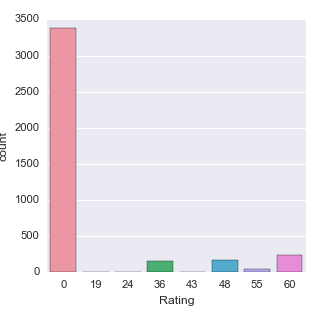

In [15]:
sns.factorplot('Rating', data=data,kind='count')
#sns.factorplot('Rating', data=nonzero_rating, kind='count')

<IPython.core.display.Javascript object>


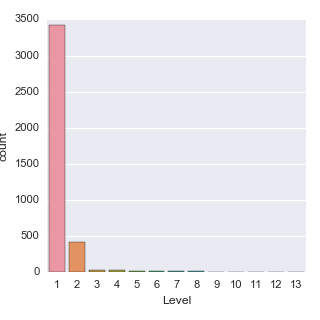

In [13]:
sns.factorplot('Level', data=data,kind='count')


In [88]:
#sns.factorplot('Level', data=nonzero_rating,kind='count')


<IPython.core.display.Javascript object>


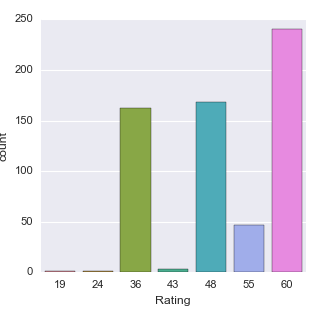

In [17]:
nonzero_rating = data[data.Rating > 0]
sns.factorplot('Rating',data=nonzero_rating,kind='count')

In [18]:
len(nonzero_rating)

623

In [19]:
nonzero_rating.count()

Rate              509
Rating            623
Level             623
Number_of_jobs    623
Category          623
Skills            621
dtype: int64

<IPython.core.display.Javascript object>


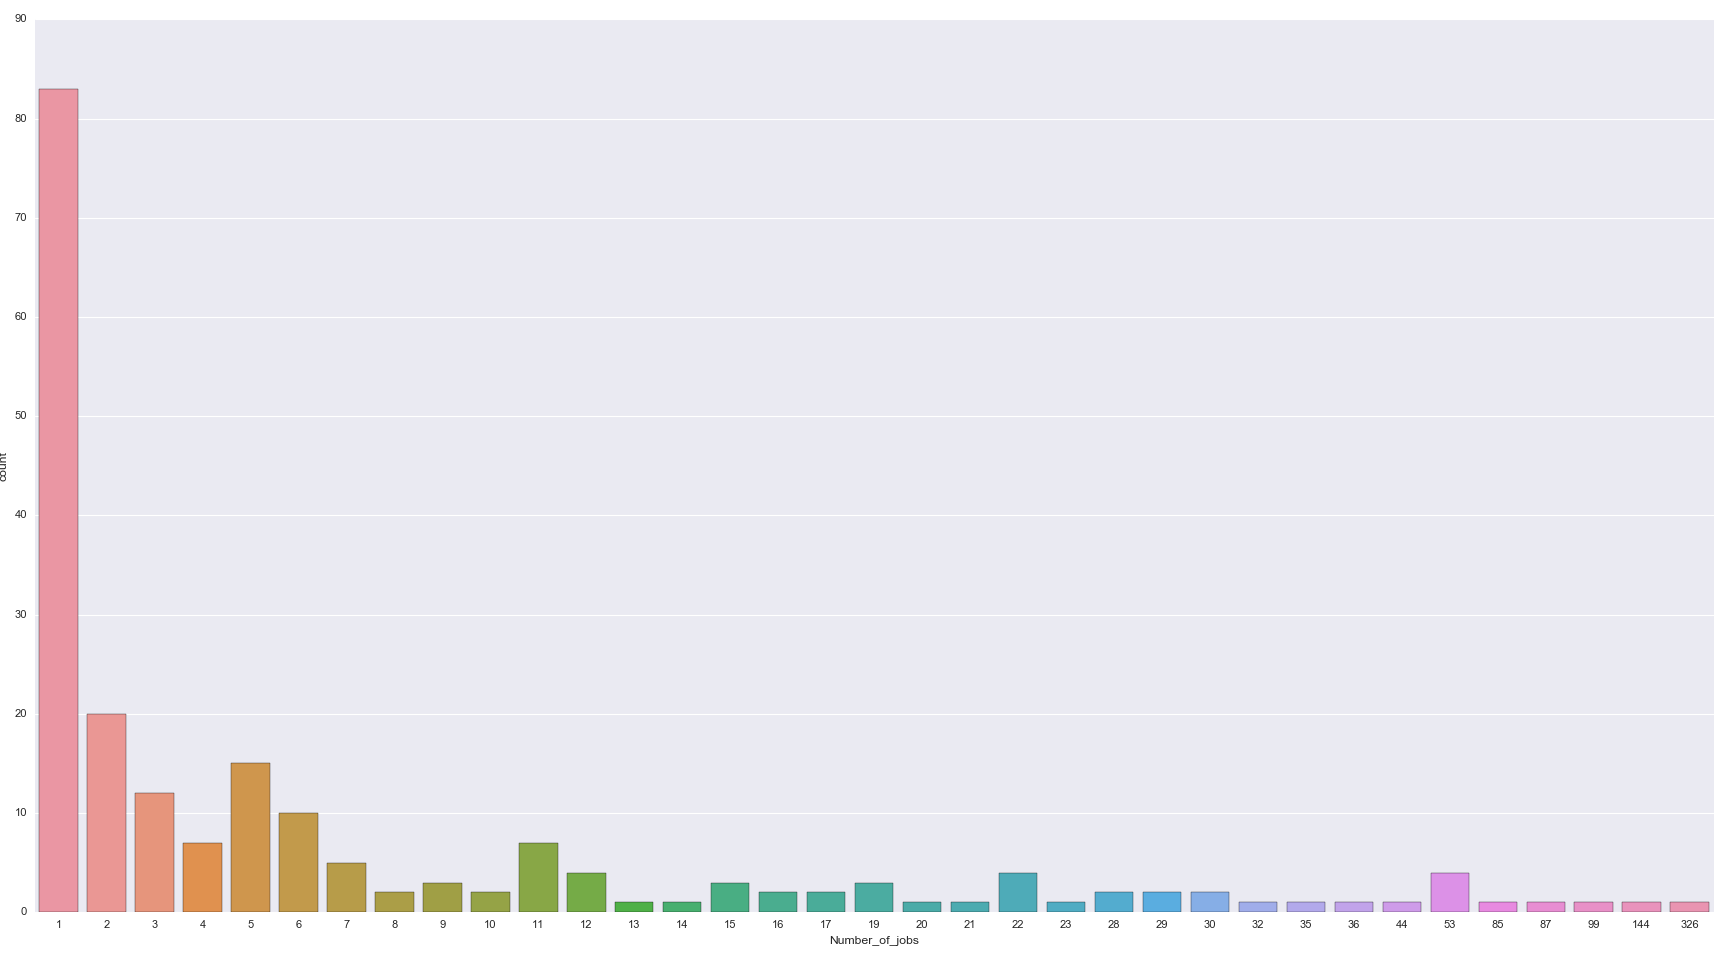

In [20]:
nonzero_jobs = data[data.Number_of_jobs > 0]
sns.factorplot('Number_of_jobs',data=nonzero_jobs,kind='count', size=12, aspect=1.8)

In [21]:
nonzero_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 3999
Data columns (total 6 columns):
Rate              190 non-null float64
Rating            208 non-null int64
Level             208 non-null int64
Number_of_jobs    208 non-null int64
Category          208 non-null object
Skills            208 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 11.4+ KB


In [22]:
nonzero_jobs.count()

Rate              190
Rating            208
Level             208
Number_of_jobs    208
Category          208
Skills            208
dtype: int64

<IPython.core.display.Javascript object>


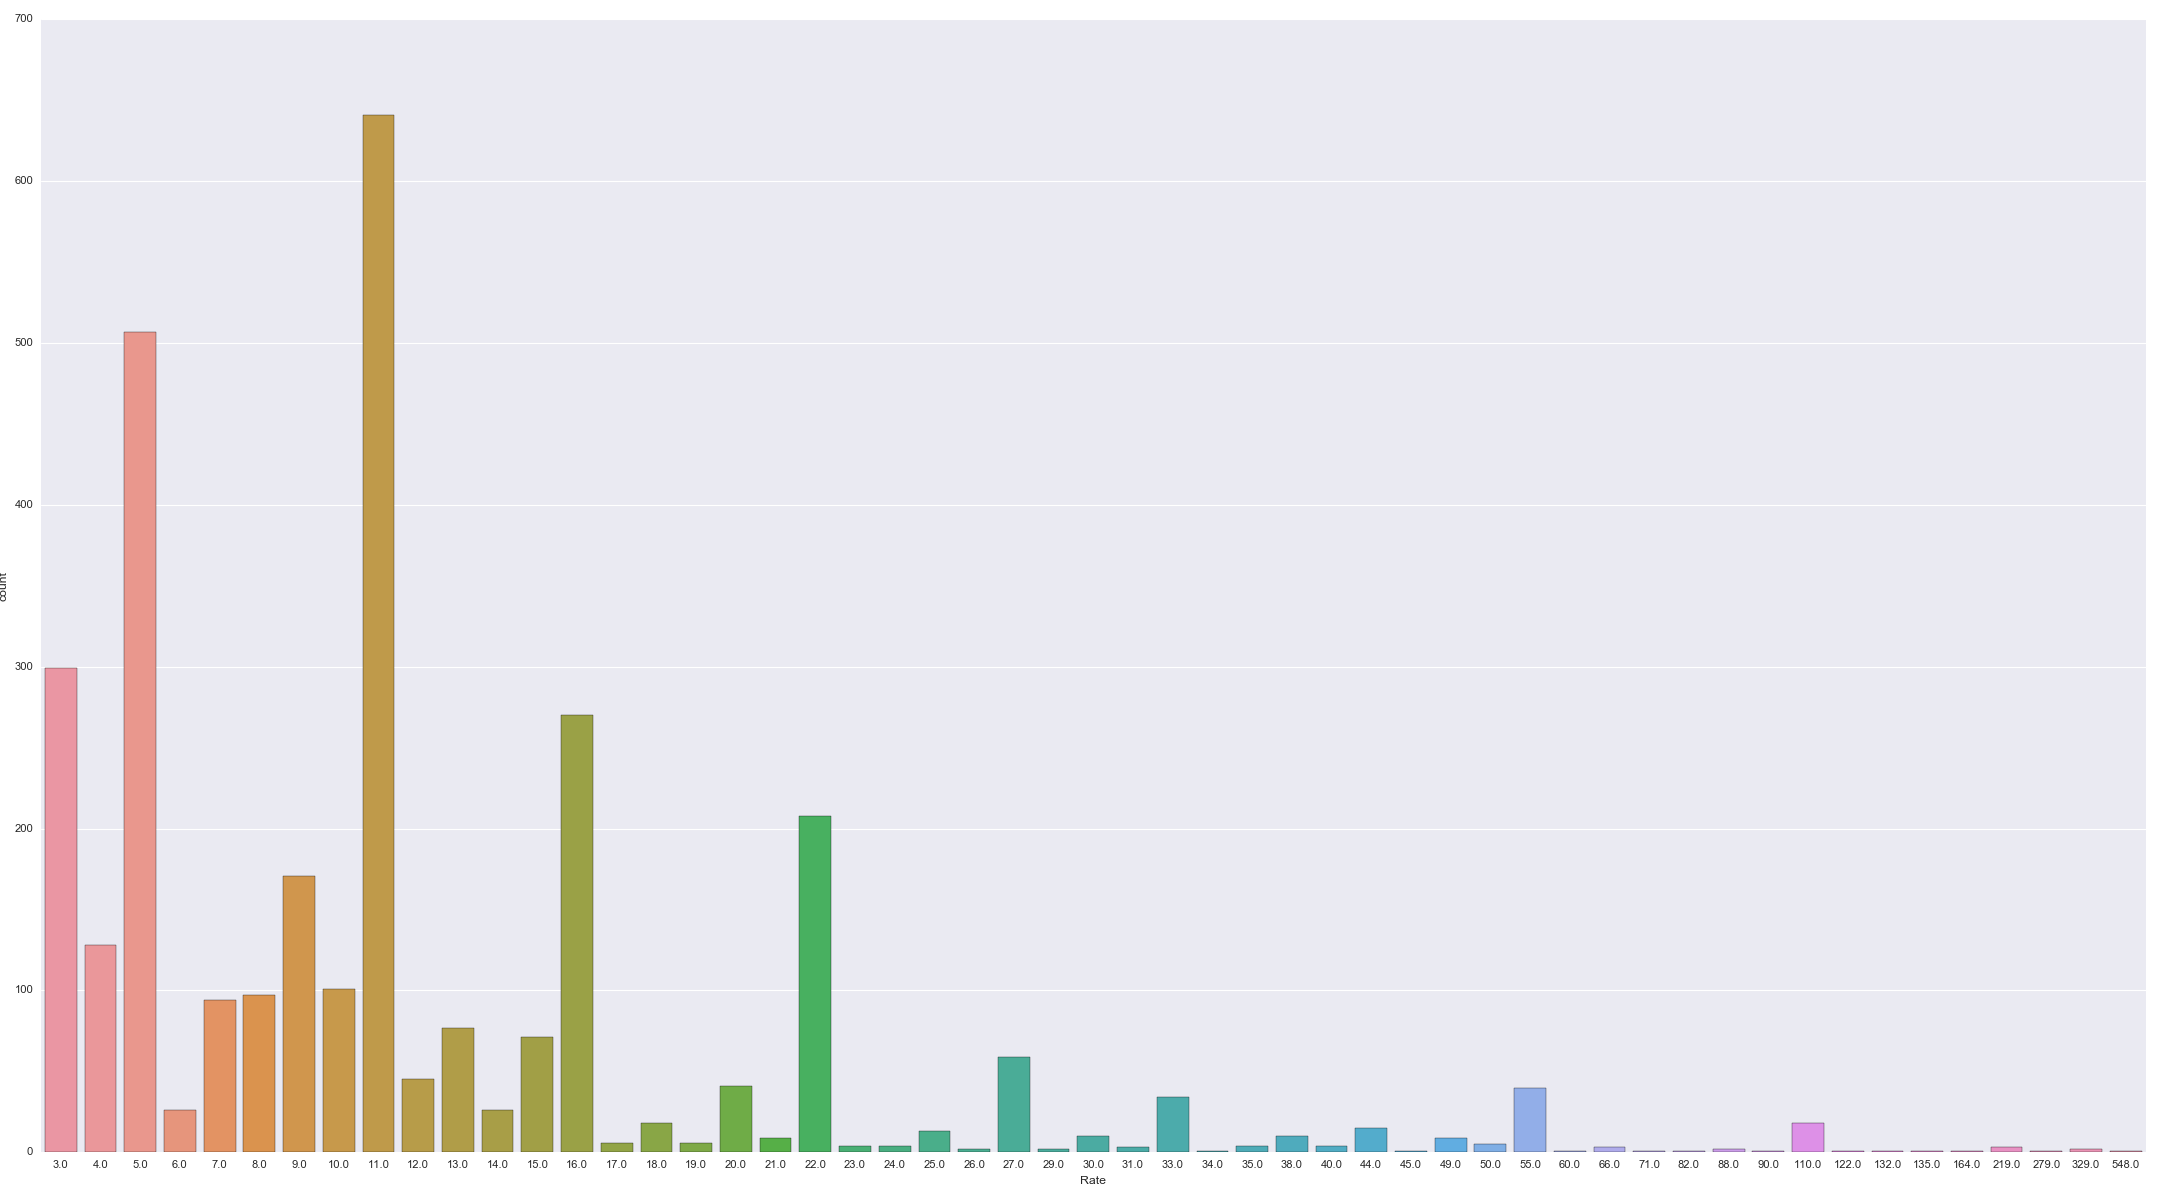

In [23]:
sns.factorplot('Rate',data=data,kind='count', size=15, aspect=1.8)


<IPython.core.display.Javascript object>


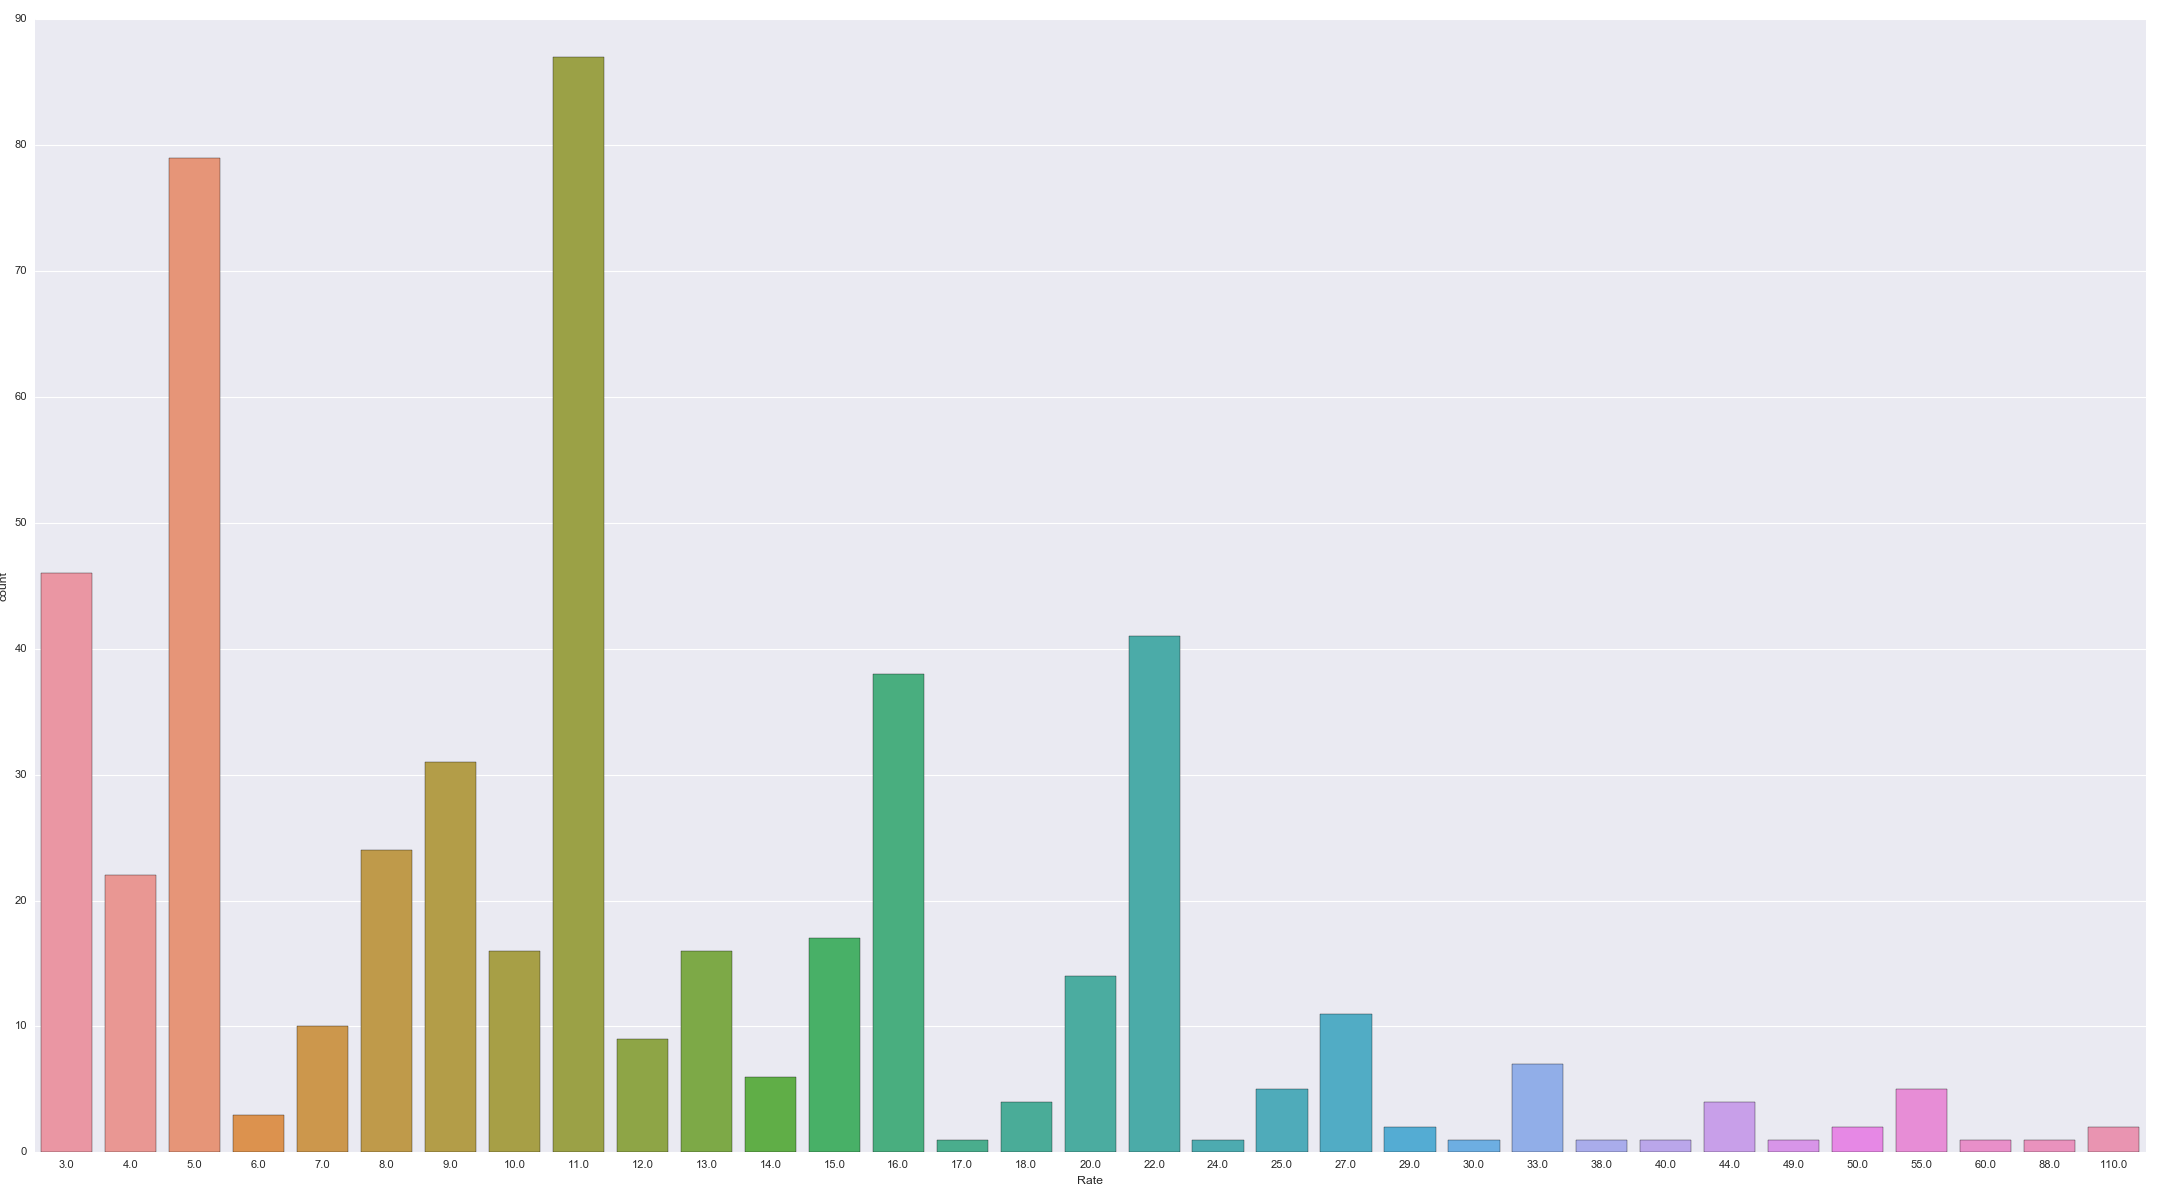

In [24]:
sns.factorplot('Rate',data=nonzero_rating,kind='count', size=15, aspect=1.8)


<IPython.core.display.Javascript object>


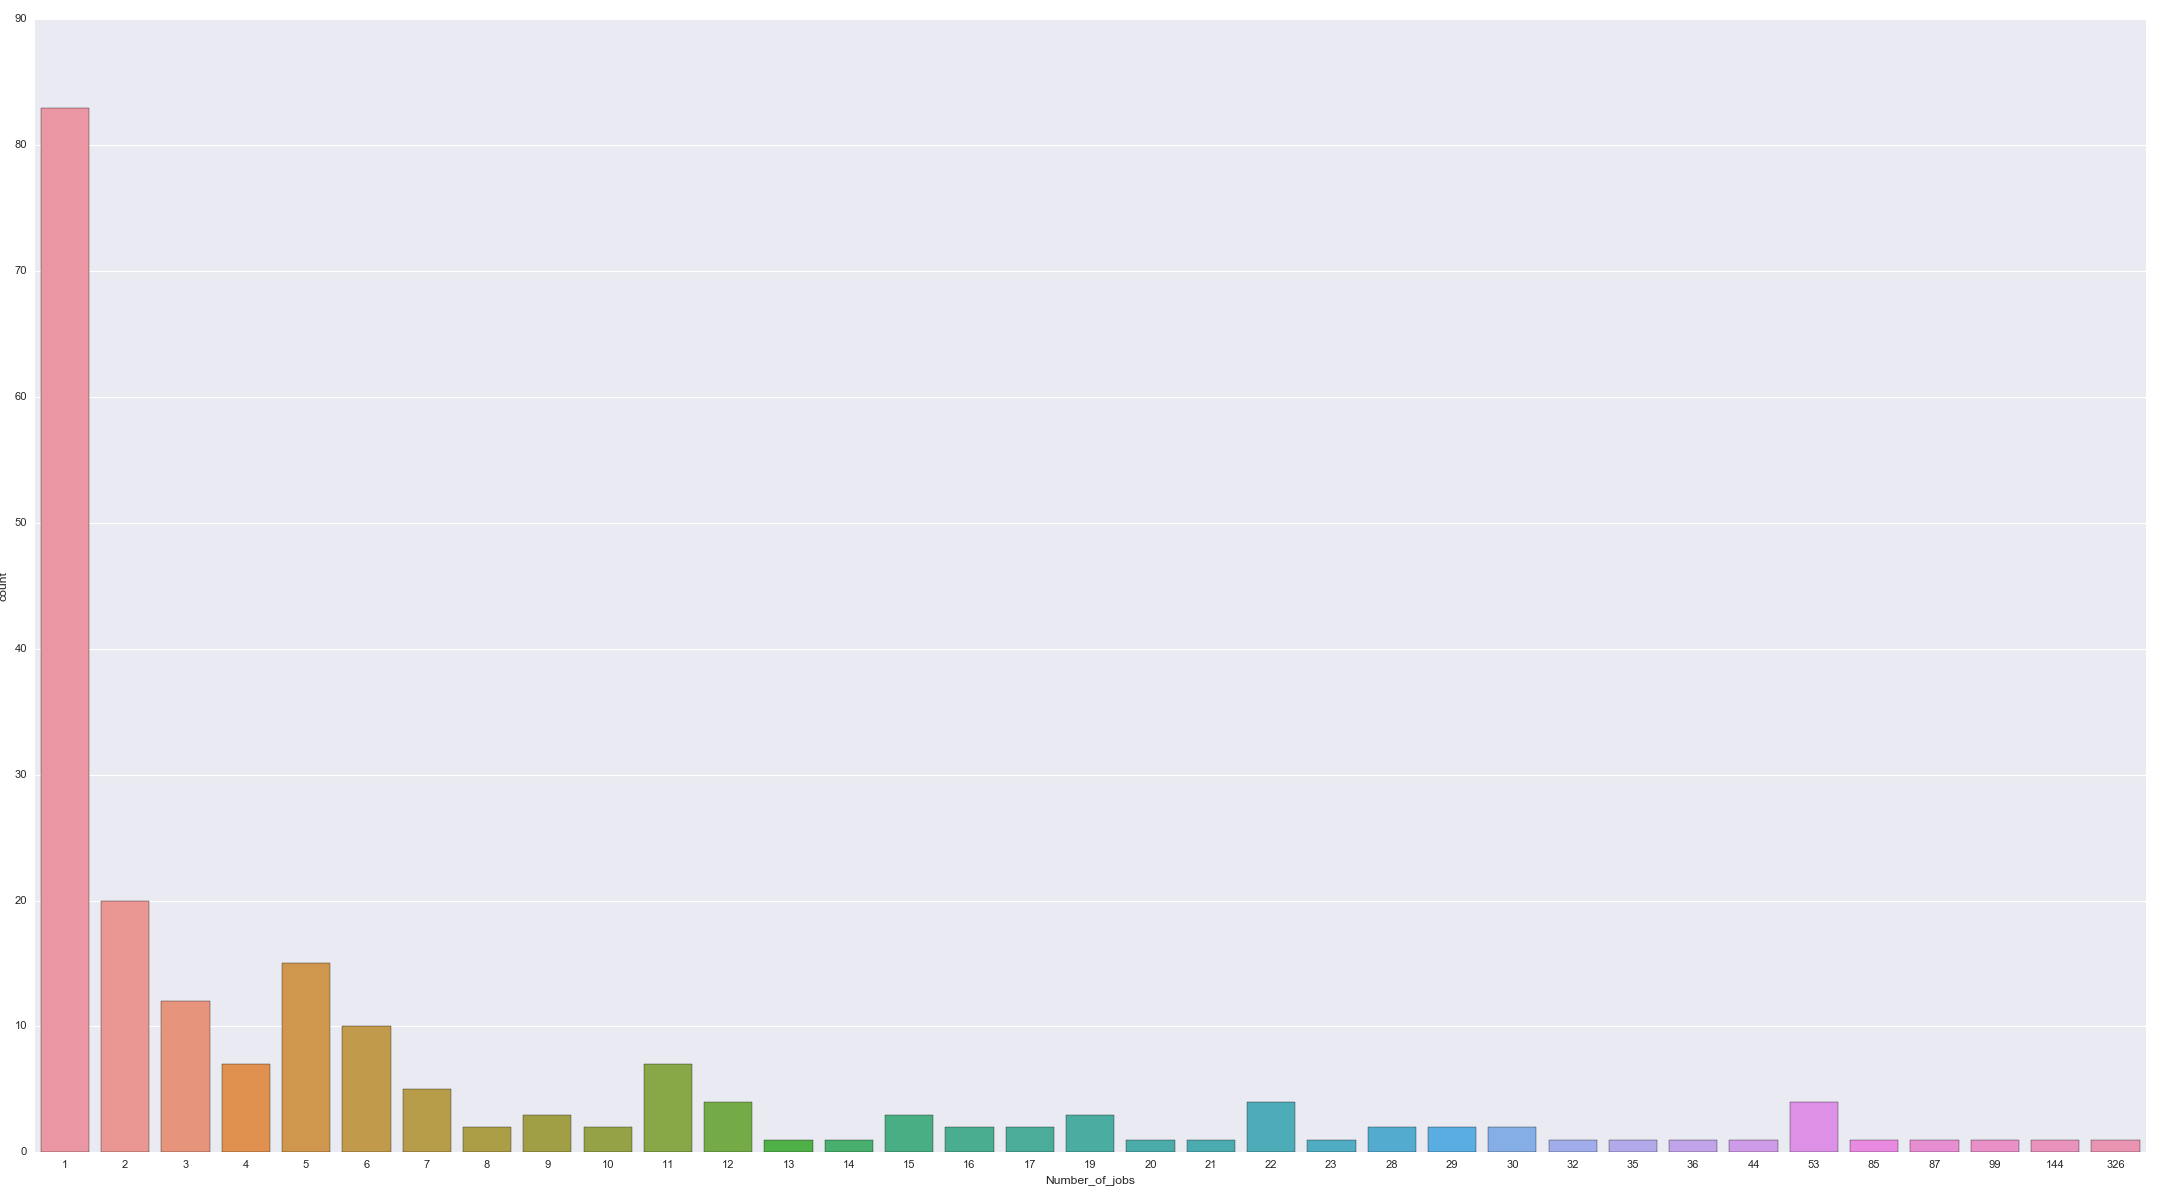

In [25]:
sns.factorplot('Number_of_jobs',data=nonzero_jobs,kind='count', size=15, aspect=1.8)


In [26]:
ratebins = pd.cut(nonzero_rating.Rate,10, precision=1)

In [27]:
pd.value_counts(ratebins)

(2.9, 13.7]     343
(13.7, 24.4]    122
(24.4, 35.1]     26
(45.8, 56.5]      8
(35.1, 45.8]      6
(99.3, 110]       2
(77.9, 88.6]      1
(56.5, 67.2]      1
(88.6, 99.3]      0
(67.2, 77.9]      0
Name: Rate, dtype: int64

In [28]:
nonzero_rating[nonzero_rating.Rate == 110]

,Rate,Rating,Level,Number_of_jobs,Category,Skills
2376,110.0,48,1,0,Writing & Translation,Article Writing Blog Writing Children's Writin...
2876,110.0,48,1,0,IT & Programming,WordPress HTML PHP5 CSS Microsoft Excel Micros...


In [29]:
nonzero_rating['binrate'] = pd.cut(nonzero_rating.Rate,10, precision=1)

/Users/subigyanepal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


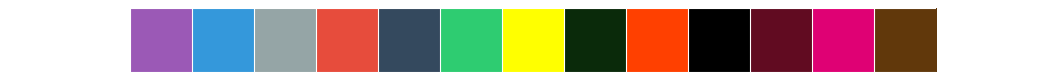

In [30]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#FFFF00", "#0A2A0A","#FF4000","#000000","#610B21","#DF0174","#61380B"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

<IPython.core.display.Javascript object>


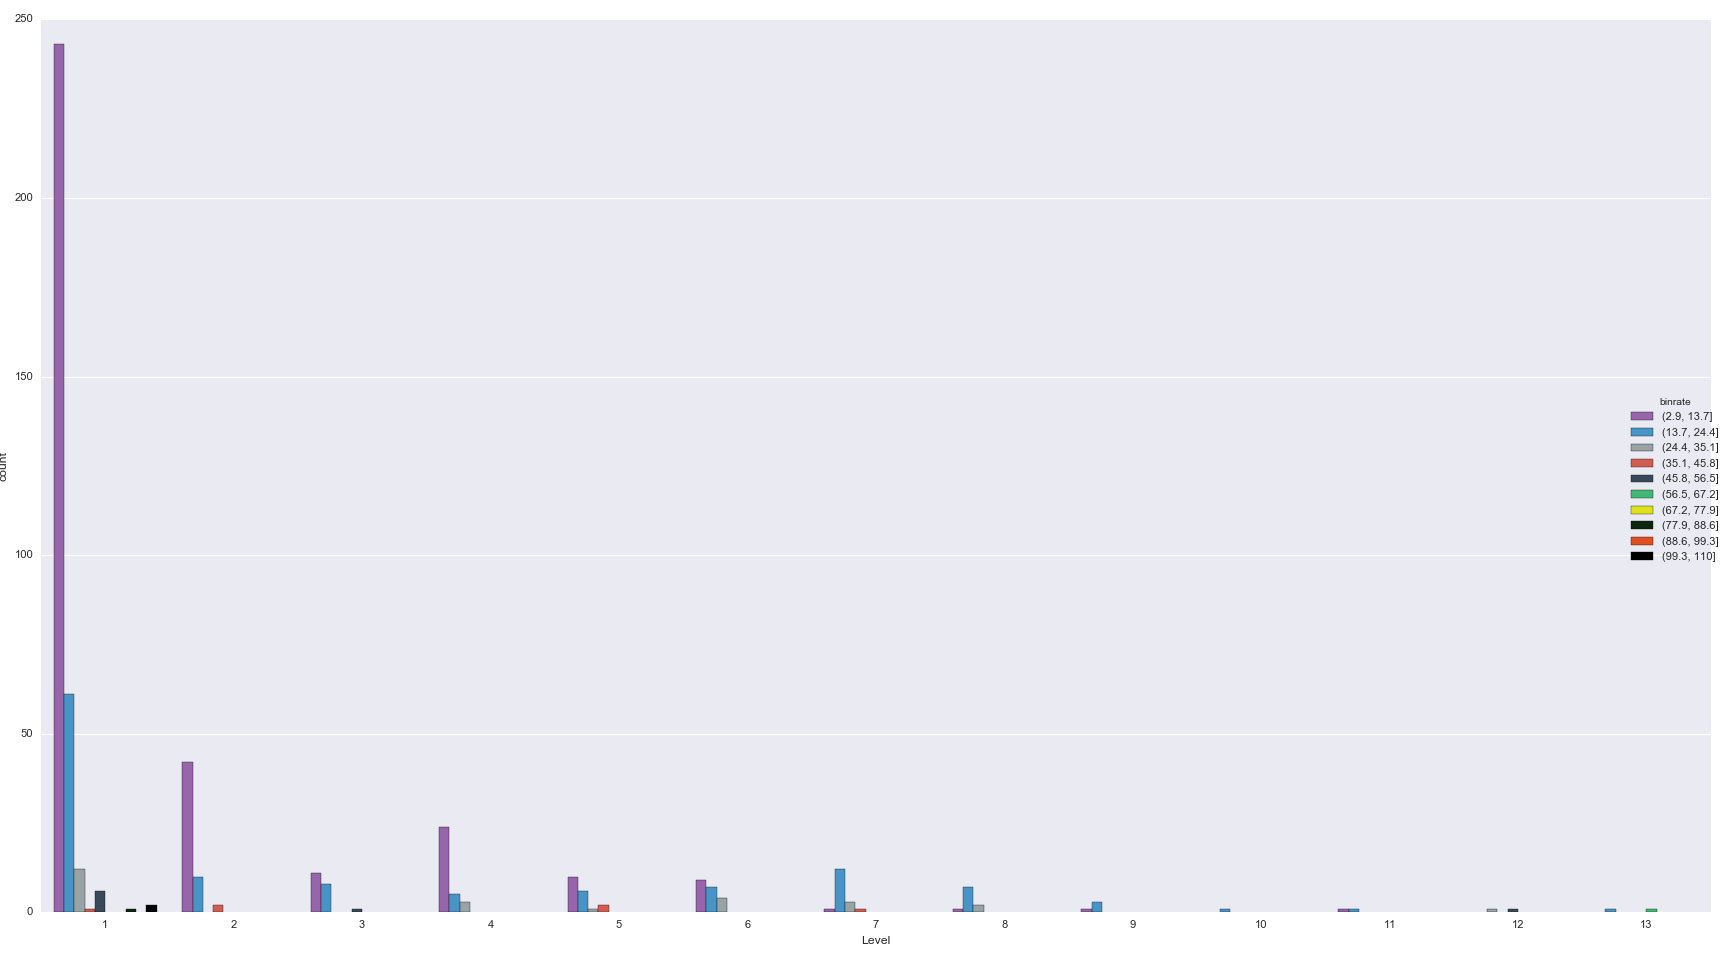

In [31]:

sns.factorplot('Level',data=nonzero_rating,kind='count', hue='binrate',size=12, aspect=1.8, palette=flatui)


In [32]:
data[data.Level == 13]

,Rate,Rating,Level,Number_of_jobs,Category,Skills
0,NaN,60,13,326,IT & Programming,WordPress PHP CSS Search Engine Marketing (SEM...
1,22.0,48,13,15,IT & Programming,WordPress CSS HTML PHP5 Search Engine Optimiza...
2,60.0,36,13,53,IT & Programming,WordPress Node.js PHP CSS Javascript jQuery Am...


In [33]:
data.describe()

,Rate,Rating,Level,Number_of_jobs
count,3099.000000,4000.000000,4000.000000,4000.000000
mean,13.534043,7.778250,1.275250,0.541500
std,19.761466,18.517702,0.987285,6.747641
min,3.000000,0.000000,1.000000,0.000000
25%,NaN,0.000000,1.000000,0.000000
50%,NaN,0.000000,1.000000,0.000000
75%,NaN,0.000000,1.000000,0.000000
max,548.000000,60.000000,13.000000,326.000000


In [34]:
nonzero_rating.describe()

,Rate,Rating,Level,Number_of_jobs
count,509.000000,623.000000,623.000000,623.000000
mean,13.049116,49.940610,2.133226,3.301766
std,11.686672,9.778972,2.175552,16.824193
min,3.000000,19.000000,1.000000,0.000000
25%,NaN,36.000000,1.000000,0.000000
50%,NaN,48.000000,1.000000,0.000000
75%,NaN,60.000000,2.000000,0.000000
max,110.000000,60.000000,13.000000,326.000000


<IPython.core.display.Javascript object>


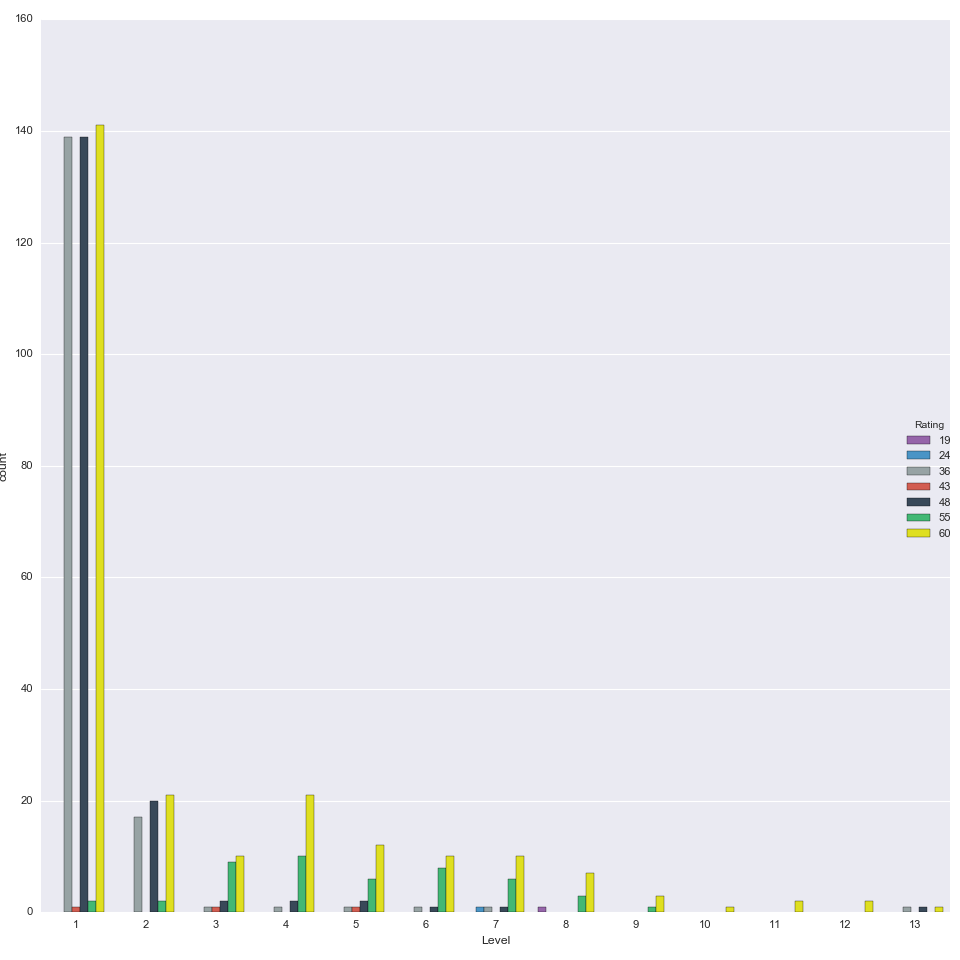

In [35]:
sns.factorplot('Level',data=nonzero_rating,kind='count', hue='Rating',size=12, palette=flatui)


In [36]:
nzjandrating_df = data[data.Number_of_jobs > 0]
nzjandrating_df = nzjandrating_df[nzjandrating_df.Rating > 0]
nzjandrating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 3999
Data columns (total 6 columns):
Rate              132 non-null float64
Rating            145 non-null int64
Level             145 non-null int64
Number_of_jobs    145 non-null int64
Category          145 non-null object
Skills            145 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 7.9+ KB


<IPython.core.display.Javascript object>


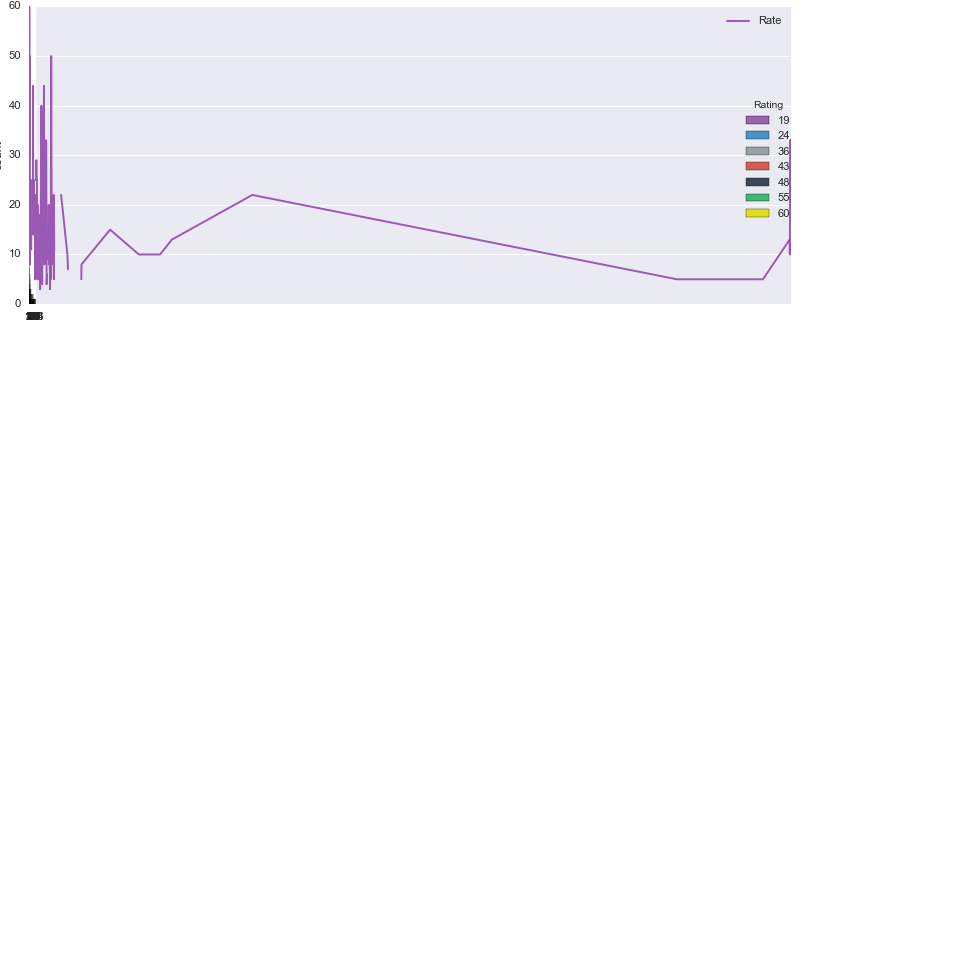

In [37]:
sns.factorplot('Number_of_jobs',data=nzjandrating_df,kind='count', hue='Rating',size=12)


<IPython.core.display.Javascript object>


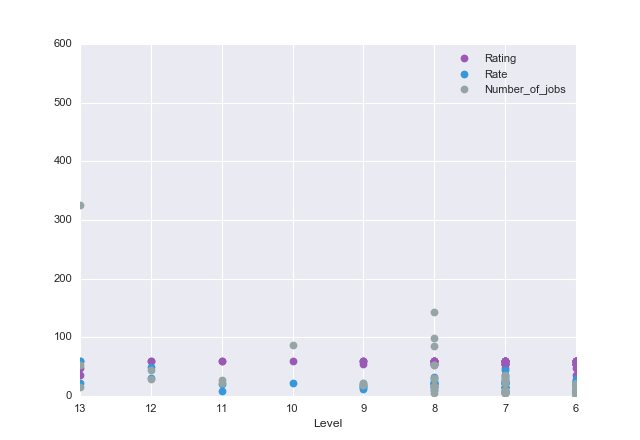

<IPython.core.display.Javascript object>


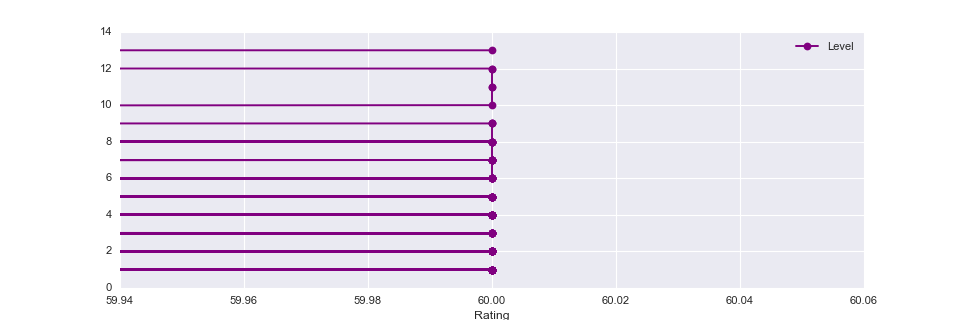

/Users/subigyanepal/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=60.0, right=60.0
  'left=%s, right=%s') % (left, right))


In [38]:
nzjandrating_df['Rate'].plot(legend=True,figsize=(10,4))
data.plot(x='Level',y=['Rating','Rate','Number_of_jobs'],linestyle='',marker='o')
nonzero_rating.plot('Rating', 'Level', figsize=(12,4),marker='o',linestyle='-',color='purple')

In [112]:
#%matplotlib inline
#sns.corrplot(nonzero_rating, annot=True, diag_names=False)

In [41]:
import nltk
import itertools

In [42]:
data['Skills'] = data['Skills'].astype('str')

In [43]:
data.dtypes

Rate              float64
Rating              int64
Level               int64
Number_of_jobs      int64
Category           object
Skills             object
dtype: object

In [ ]:
tokens = [nltk.word_tokenize(skills.lower()) for skills in data['Skills']]

In [117]:
tokenized = list(itertools.chain(*tokens))

In [118]:
skills = nltk.Text(tokenized)

In [119]:
skills.count('wordpress')

952

In [120]:
frequency = nltk.FreqDist(skills)

In [121]:
frequency

FreqDist({'microsoft': 2271, 'adobe': 2091, 'writing': 2015, 'photoshop': 1113, 'wordpress': 952, 'html': 881, 'html5': 874, 'css': 836, 'design': 811, 'excel': 808, ...})

In [122]:
%matplotlib inline
frequency.plot(50, cumulative=False)

In [124]:
frequency.hapaxes()

['incharge',
 'apache/iis',
 'latter',
 'field-map',
 'createjs',
 'risk',
 'voice-over',
 'elocution',
 'unity3d',
 'school',
 'prize',
 'companies',
 'php/php5',
 'sculpting',
 'guiding',
 'deadline',
 'zurb-foundation',
 'enjoy',
 'estimations',
 'specially',
 'cabling',
 'omnigraffile',
 'feasibility',
 'windev',
 'second',
 'established',
 'hero',
 'altium',
 'mep',
 'iphone/ipad',
 'compositor',
 'smoke',
 'rafting',
 'landscape',
 'motivate',
 'astaro',
 'css/3',
 'mentalray',
 'vps',
 'wars',
 'tying',
 '1999',
 'desingning',
 'author-it',
 'concepts',
 'jquery-mobile',
 'im',
 'mx',
 'give',
 'zend2',
 'andorid',
 'end',
 'provide',
 'how',
 'modulation',
 'thankyou',
 'sparql',
 'jungle',
 'plumbing',
 'amit',
 'operate',
 'interpreting',
 'deck',
 'netb',
 '6.0',
 'before',
 'scoring',
 'estonian',
 'jquary',
 'rocfall',
 'brd',
 'then',
 'them',
 'typescript',
 'mssql2008',
 'penetration',
 'workflows',
 'resizing',
 'elasticseach',
 'classified',
 'flyers',
 'axure',
 'mea

In [125]:
sns.factorplot('Level',data=data,kind='count', hue='Rating',size=12)

In [126]:
skills.collocations()

adobe photoshop; computer skills; microsoft excel; search engine;
microsoft word; data entry; engine optimization; content writing;
microsoft powerpoint; adobe illustrator; mysql administration; social
media; web design; excel microsoft; creative writing; .net framework;
sql server; online writing; adobe dreamweaver; customer service


In [146]:
tokens = [nltk.word_tokenize(skills.lower()) for skills in nonzero_jobs['Skills']]
tokenized = list(itertools.chain(*tokens))
skills = nltk.Text(tokenized)
frequency = nltk.FreqDist(skills)
frequency.plot(50)

print "Collocations"
skills.collocations()

In [128]:
frequency.hapaxes()

In [129]:
rate_5df = data[data.Rate <= 5]
rate_5df = rate_5df[rate_5df.Rating > 0]
#rate_5df = rate_5df[rate_5df.Number_of_jobs > 0]

tokens = [nltk.word_tokenize(skills.lower()) for skills in rate_5df['Skills']]
tokenized = list(itertools.chain(*tokens))
skills = nltk.Text(tokenized)
frequency = nltk.FreqDist(skills)


print "Collocations"
skills.collocations()

Collocations
adobe photoshop; data entry; computer skills; microsoft excel;
microsoft word; search engine; engine optimization; internet research;
microsoft powerpoint; content writing; adobe illustrator; facebook
marketing; .net framework; web design; excel microsoft; mysql
administration; administrative support; word microsoft; adobe
indesign; logo design


In [130]:
#frequency.plot(50, cumulative=False)

In [131]:
#plot.cla()

In [132]:


rate_5df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 32 to 3990
Data columns (total 6 columns):
Rate              147 non-null float64
Rating            147 non-null int64
Level             147 non-null int64
Number_of_jobs    147 non-null int64
Category          147 non-null object
Skills            147 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 8.0+ KB


In [133]:
#rate_5df.head()

In [134]:
#rate_5df=rate_5df[rate_5df.Number_of_jobs > 0]
#sns.factorplot('Number_of_jobs',data=rate_5df,kind='count')

In [135]:
rate_10df = data[data.Rate >= 15]
rate_10df = rate_10df[rate_10df.Rating > 0]
#rate_10df = rate_10df[rate_10df.Number_of_jobs > 0]

tokens = [nltk.word_tokenize(skills.lower()) for skills in rate_10df['Skills']]
tokenized = list(itertools.chain(*tokens))
skills = nltk.Text(tokenized)
frequency = nltk.FreqDist(skills)
#frequency.plot(50)

print "Collocations"
skills.collocations()

Collocations
adobe photoshop; search engine; engine optimization; computer skills;
mysql administration; ecommerce consulting; microsoft excel; app
development; linux system; microsoft word; .net framework; sql server;
content writing; twitter bootstrap; adobe illustrator; excel
microsoft; iphone app; system administration; server programming;
active directory


<IPython.core.display.Javascript object>


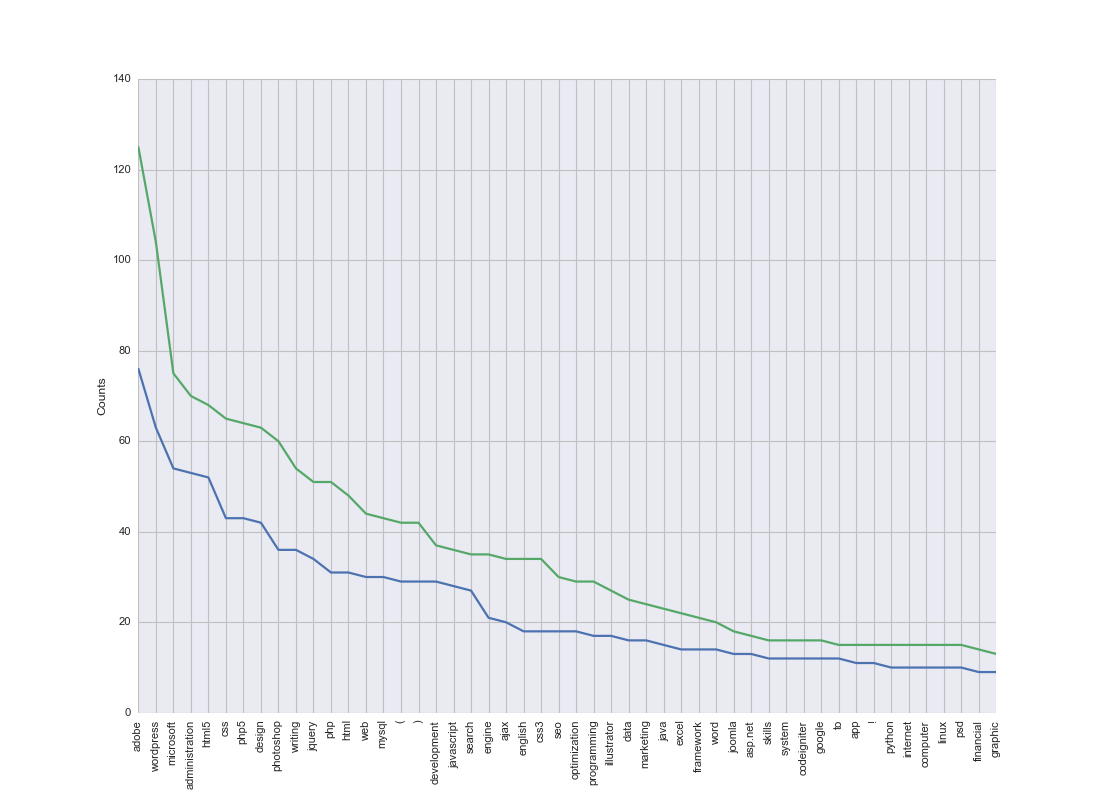

In [136]:
frequency.plot(50, cumulative=False)

In [137]:
#frequency.keys()

In [138]:
#data[data.Level == 1]

In [139]:
nonzero_rating[nonzero_rating.Rate == 110]

,Rate,Rating,Level,Number_of_jobs,Category,Skills
2376,110,48,1,0,Writing & Translation,Article Writing Blog Writing Children's Writin...
2876,110,48,1,0,IT & Programming,WordPress HTML PHP5 CSS Microsoft Excel Micros...


In [140]:
#sns.factorplot('Level', data=lessthan3, kind='count')

In [141]:
lessthan3 = nonzero_rating[nonzero_rating.Rate == 3]

In [143]:
in110 = nonzero_rating[nonzero_rating.Rate == 3]

In [145]:
rate_50df = data[data.Rate >= 50]
rate_50df = rate_50df[rate_50df.Rating > 0]
#rate_10df = rate_10df[rate_10df.Number_of_jobs > 0]

tokens = [nltk.word_tokenize(skills.lower()) for skills in rate_10df['Skills']]
tokenized = list(itertools.chain(*tokens))
skills = nltk.Text(tokenized)
frequency = nltk.FreqDist(skills)
#frequency.plot(50)

print "Collocations"
skills.collocations()

Collocations
adobe photoshop; search engine; engine optimization; computer skills;
mysql administration; ecommerce consulting; microsoft excel; app
development; linux system; microsoft word; .net framework; sql server;
content writing; twitter bootstrap; adobe illustrator; excel
microsoft; iphone app; system administration; server programming;
active directory
